In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dat=pd.read_clipboard(header=0,squeeze=True)

In [3]:
dat.tail()

,direction,pe,dv,retALSI,lag
6037,1,4.615059,-1.346822,1.629155,1.629155
6038,1,-0.437425,-0.339559,0.135424,0.135424
6039,1,1.065902,-1.025650,1.013595,1.013595
6040,1,1.006961,-1.384105,1.448496,1.448496
6041,1,0.665718,-0.699304,0.641149,0.641149


In [4]:
Y=dat['retALSI']

In [5]:
X=dat.drop(['retALSI','direction'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
RFregr=regr.fit(X_train, Y_train) 

In [8]:
RF_train_score = RFregr.score(X_train,Y_train)
RF_test_score = RFregr.score(X_test, Y_test)

In [22]:
print("Random Forest regression train score low alpha:", RF_train_score)
print("Random Forest regression test score low alpha:", RF_test_score)

Random Forest regression train score low alpha: 0.849869350469207
Random Forest regression test score low alpha: 0.8669687728279566


# Prediction

In [23]:
Prediction=RFregr.predict(X_test)
from sklearn.metrics import mean_squared_error
test_mse=mean_squared_error(Y_test, Prediction)
print("Random Forest regression pmse:", test_mse)

Random Forest regression pmse: 0.17729602934160396


In [13]:
# Feature Importance

[0. 0. 1.]


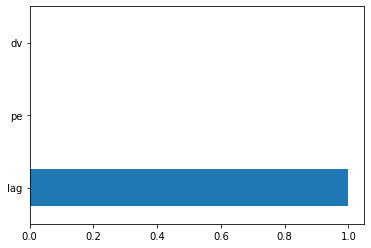

In [19]:
print(RFregr.feature_importances_)##
import matplotlib.pyplot as plt
feat_importances = pd.Series(RFregr.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
residuals=Y_test-Prediction